In [549]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import confusion_matrix

# **Using the given dataset (heart), make a "Decision Tree" model with the best accuracy**

In [75]:
#your code goes here
df = pd.read_csv('heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [145]:
x = df.drop(['target'], axis = 1)
y = df['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=77, shuffle =True)

heart = DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=14) 
heart.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=14)

In [146]:
print('heart Train Score is : ' , heart.score(x_train, y_train))
print('heart Test Score  is : ' , heart.score(x_test, y_test))

heart Train Score is :  0.8490566037735849
heart Test Score  is :  0.8351648351648352


In [147]:
y_pred = heart.predict(x_test)
print('Predicted Value for heart is : \n' , y_pred[:10])
y_test[:10]

Predicted Value for heart is : 
 [1 1 1 1 0 0 0 0 1 1]


8      1
37     1
142    1
65     1
256    0
298    0
190    0
59     1
118    1
144    1
Name: target, dtype: int64

Confusion Matrix is : 
 [[30  7]
 [ 8 46]]


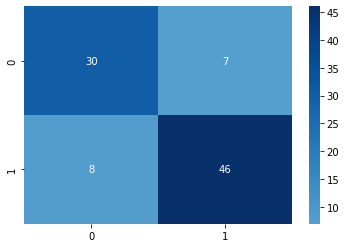

In [158]:
CM = confusion_matrix(y_test, y_pred)
print('Confusion Matrix is : \n', CM)
sns.heatmap(CM, annot=True, center = True, cmap='Blues')
plt.show()

# **Using the given dataset (data), make a "Decision Tree" model with the best accuracy**

In [163]:
#your code goes here
df = pd.read_csv('data.csv')
df

,1,3026.385
0,1,3554.230769
1,1,2902.384615
2,1,3348.076923
3,2,3068.538462
4,2,4357.076923
5,2,4626.923077
6,2,4188.076923
7,2,4957.307692
8,2,4399.153846
9,3,4862.923077


In [174]:
x = df.drop(['3026.385'], axis = 1)
y = df['3026.385']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=44, shuffle =True)

data = DecisionTreeRegressor(max_depth=3,random_state=14) 
data.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=14)

In [175]:
print('data Train Score is : ' , data.score(x_train, y_train))
print('data Test Score  is : ' , data.score(x_test, y_test))

data Train Score is :  0.9364066210948919
data Test Score  is :  0.973790318218413


In [176]:
y_pred = data.predict(x_test)
print('Predicted Value for DecisionTreeRegressorModel is : \n' , y_pred[:10])
y_test[:10]

Predicted Value for DecisionTreeRegressorModel is : 
 [4342.94230775 7014.76923067 3228.307692   9394.7307695  8332.3846155
 4342.94230775]


8     4399.153846
19    7056.769231
2     3348.076923
26    8664.230769
22    8754.769231
11    4381.307692
Name: 3026.385, dtype: float64

In [177]:
MAEValue = mean_absolute_error(y_test, y_pred, multioutput='uniform_average') # it can be raw_values
print('Mean Absolute Error Value is : ', MAEValue)

MSEValue = mean_squared_error(y_test, y_pred, multioutput='uniform_average') # it can be raw_values
print('Mean Squared Error Value is : ', MSEValue)

Mean Absolute Error Value is :  234.87179497222283
Mean Squared Error Value is :  122129.88710083283


# **Using the given dataset (houses), make a "Random Forest" model with the best accuracy**

In [237]:
#your code goes here
df = pd.read_csv('houses.csv')
df

,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,price
0,3,1.00,1180,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,22.190
1,3,2.25,2570,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,53.800
2,2,1.00,770,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,18.000
3,4,3.00,1960,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,60.400
4,3,2.00,1680,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,51.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,2,1.00,740,1.0,0,0,3,6,740,0,1953,0,47.5077,-122.344,1170,17.850
995,4,2.50,1860,2.0,0,0,4,7,1860,0,1991,0,47.3492,-122.030,1860,29.100
996,2,2.75,1590,1.5,0,0,3,5,1590,0,1920,0,47.2786,-122.250,1310,19.995
997,2,1.00,850,1.0,0,0,3,7,850,0,1922,0,47.6707,-122.328,1300,55.350


In [406]:
x = df.drop(['price'], axis = 1)
y = df['price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=88, shuffle =True)

houses = RandomForestRegressor(n_estimators=100,max_depth=9, random_state=39) 
houses.fit(x_train, y_train)

RandomForestRegressor(max_depth=9, random_state=39)

In [407]:
print('houses Train Score is : ' , houses.score(x_train, y_train))
print('houses Test Score is : ' , houses.score(x_test, y_test))
print('houses No. of features are : ' , houses.n_features_)

houses Train Score is :  0.9600439272260419
houses Test Score is :  0.8391651108133603
houses No. of features are :  15


In [408]:
y_pred = houses.predict(x_test)
print('Predicted Value for Random Forest Regressor is : ' , y_pred[:10])
print('Actual Value for Random Forest Regressor is : ' , y_test[:10])

Predicted Value for Random Forest Regressor is :  [146.13340152  33.34227681  55.77747905  40.39898759 152.3575
  62.51566992  22.58104131  68.27845738  24.2254887   30.30730333]
Actual Value for Random Forest Regressor is :  5      123.00
958     34.55
564     63.87
528     36.50
270    137.00
964     63.00
557     23.80
673     86.50
859     16.66
575     30.00
Name: price, dtype: float64


In [410]:
MAEValue = mean_absolute_error(y_test, y_pred, multioutput='uniform_average')
print('Mean Absolute Error Value is : ', MAEValue)

MSEValue = mean_squared_error(y_test, y_pred, multioutput='uniform_average')
print('Mean Squared Error Value is : ', MSEValue)

Mean Absolute Error Value is :  7.781749538930943
Mean Squared Error Value is :  154.91469640695522


# **Using the given dataset (heart), make a "Random Forest" model with the best accuracy**

In [411]:
#your code goes here
df = pd.read_csv('heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [505]:
x = df.drop(['target'], axis = 1)
y = df['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=44, shuffle =True)

heart = RandomForestClassifier(criterion = 'gini', n_estimators=50,max_depth=6, random_state=44) 
heart.fit(x_train, y_train)

RandomForestClassifier(max_depth=6, n_estimators=50, random_state=44)

In [506]:
print('heart Train Score is : ' , heart.score(x_train, y_train))
print('heart Test Score  is : ' , heart.score(x_test, y_test))

heart Train Score is :  0.9802955665024631
heart Test Score  is :  0.88


In [507]:
y_pred = heart.predict(x_test)
print('Predicted Value for heart is : ' , y_pred[:10])
y_test[:10]

Predicted Value for heart is :  [1 1 1 1 1 1 0 1 0 0]


94     1
54     1
261    0
172    0
44     1
12     1
95     1
111    1
225    0
198    0
Name: target, dtype: int64

Confusion Matrix is : 
 [[38  8]
 [ 4 50]]


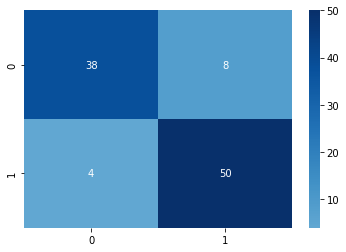

In [508]:
CM = confusion_matrix(y_test, y_pred)
print('Confusion Matrix is : \n', CM)
sns.heatmap(CM, annot=True, center = True, cmap='Blues')
plt.show()

# **Using the given dataset (heart), make a "kNN" model with the best accuracy**

In [593]:
#your code goes here
df = pd.read_csv('heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [595]:
x = df.drop(['target'], axis = 1)
y = df['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=44, shuffle =True)

KNNClassifierModel = KNeighborsClassifier(n_neighbors= 8,weights ='uniform',algorithm='auto')
KNNClassifierModel.fit(x_train, y_train)
print('KNNClassifierModel Train Score is : ' , KNNClassifierModel.score(x_train, y_train))
print('KNNClassifierModel Test Score is : ' , KNNClassifierModel.score(x_test, y_test))

KNNClassifierModel Train Score is :  0.6798029556650246
KNNClassifierModel Test Score is :  0.68


In [542]:
y_pred = KNNClassifierModel.predict(x_test)
y_pred_prob = KNNClassifierModel.predict_proba(x_test)
print('Predicted Value for KNNClassifierModel is : ' , y_pred[:10])
y_test[:10]

Predicted Value for KNNClassifierModel is :  [0 1 1 1 1 1 0 1 0 0]


94     1
54     1
261    0
172    0
44     1
12     1
95     1
111    1
225    0
198    0
Name: target, dtype: int64

Confusion Matrix is : 
 [[30 16]
 [16 38]]


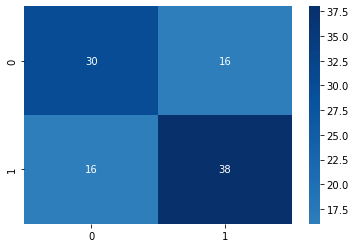

In [543]:
CM = confusion_matrix(y_test, y_pred)
print('Confusion Matrix is : \n', CM)
sns.heatmap(CM, annot=True, center = True, cmap='Blues')
plt.show()

# **Using the given dataset (houses), make a "kNN" model with the best accuracy**

In [597]:
#your code goes here
df = pd.read_csv('houses.csv')
df

,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,price
0,3,1.00,1180,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,22.190
1,3,2.25,2570,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,53.800
2,2,1.00,770,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,18.000
3,4,3.00,1960,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,60.400
4,3,2.00,1680,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,51.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,2,1.00,740,1.0,0,0,3,6,740,0,1953,0,47.5077,-122.344,1170,17.850
995,4,2.50,1860,2.0,0,0,4,7,1860,0,1991,0,47.3492,-122.030,1860,29.100
996,2,2.75,1590,1.5,0,0,3,5,1590,0,1920,0,47.2786,-122.250,1310,19.995
997,2,1.00,850,1.0,0,0,3,7,850,0,1922,0,47.6707,-122.328,1300,55.350


In [599]:
x = df.drop(['price'], axis = 1)
y = df['price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=88, shuffle =True)

KNNRegressorModel = KNeighborsRegressor(n_neighbors= 6,weights ='uniform',algorithm='auto')
KNNRegressorModel.fit(x_train, y_train)
print('KNNRegressorModel Train Score is : ' , KNNRegressorModel.score(x_train, y_train))
print('KNNRegressorModel Test Score is : ' , KNNRegressorModel.score(x_test, y_test))

KNNRegressorModel Train Score is :  0.6284151967366098
KNNRegressorModel Test Score is :  0.615445023260711


In [601]:
y_pred = KNNRegressorModel.predict(x_test)
print('Predicted Value for KNNClassifierModel is : ' , y_pred[:10])
y_test[:10]

Predicted Value for KNNClassifierModel is :  [168.16666667  37.06666667  46.84        26.5745     153.66666667
  71.29833333  31.78333333  33.00833333  31.1475      36.37248333]


5      123.00
958     34.55
564     63.87
528     36.50
270    137.00
964     63.00
557     23.80
673     86.50
859     16.66
575     30.00
Name: price, dtype: float64

In [602]:
MAEValue = mean_absolute_error(y_test, y_pred, multioutput='uniform_average')
print('Mean Absolute Error Value is : ', MAEValue)

MSEValue = mean_squared_error(y_test, y_pred, multioutput='uniform_average')
print('Mean Squared Error Value is : ', MSEValue)

Mean Absolute Error Value is :  14.060026333333333
Mean Squared Error Value is :  370.39984156807776


# **Note: You have to choose whether to use a regressor model or a classifier model according to the dataset type (continuous or categorical)**